In [1]:
from pysead.Frame_2D import Member_2D, Frame_2D
import pandas as pd

nodes_sheet = pd.read_csv('nodes.csv')
elements_sheet = pd.read_csv('bar_elements.csv')
supports_sheet = pd.read_csv('supports.csv')
forces_sheet = pd.read_csv('nodal_loads.csv')

nodes_sheet['Node'] = nodes_sheet['Node'] + 1
elements_sheet['Element'] = elements_sheet['Element'] + 1
supports_sheet['Node'] = supports_sheet['Node'] + 1
forces_sheet['Node'] = forces_sheet['Node'] + 1

width = 0.300
depth = 0.500
fc = 21

area = width*depth
elasticity = 4700*(fc)**(1/2) * 1000
inertia = 1/12*width*depth**3

# Compile all members
member_list = []

for m in range(len(elements_sheet)): 
    # sort nodes
    node_1 = elements_sheet['Node_1'][m]+1
    node_2 = elements_sheet['Node_2'][m]+1

    element_node = sorted({node_1,node_2})
    # element_node = [node_1,node_2]

    globals()[f'M{m+1}'] = Member_2D(member_number=m+1, 
                                    area=area, 
                                    elasticity=elasticity, 
                                    inertia=inertia, 
                                    nodes={element_node[0]: [nodes_sheet['x_coord'][element_node[0]-1], nodes_sheet['y_coord'][element_node[0]-1]],
                                           element_node[1]: [nodes_sheet['x_coord'][element_node[1]-1], nodes_sheet['y_coord'][element_node[1]-1]]})
    string = f'M{m+1}'
    member_list.append(globals()[string])

# # Add selfweight per member
for member in member_list:
    member.Add_Self_Weight(23.5)
# M1.Add_Self_Weight(23.5)
# M3.Add_Self_Weight(23.5)

Frame = Frame_2D()
Frame.Compile_Frame_Member_Properties(member_list)

# Add Supports
support_array = [1,1,1]

supports={}
for i in range(len(supports_sheet)):
    supports.update({supports_sheet['Node'][i]: support_array})

Frame.supports = supports

# Add Nodal Forces
forces_array = [10,0,0]

forces={}
for i in range(len(forces_sheet)):
    forces.update({forces_sheet['Node'][i]: forces_array})

Frame.Add_Load_Node(forces)

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


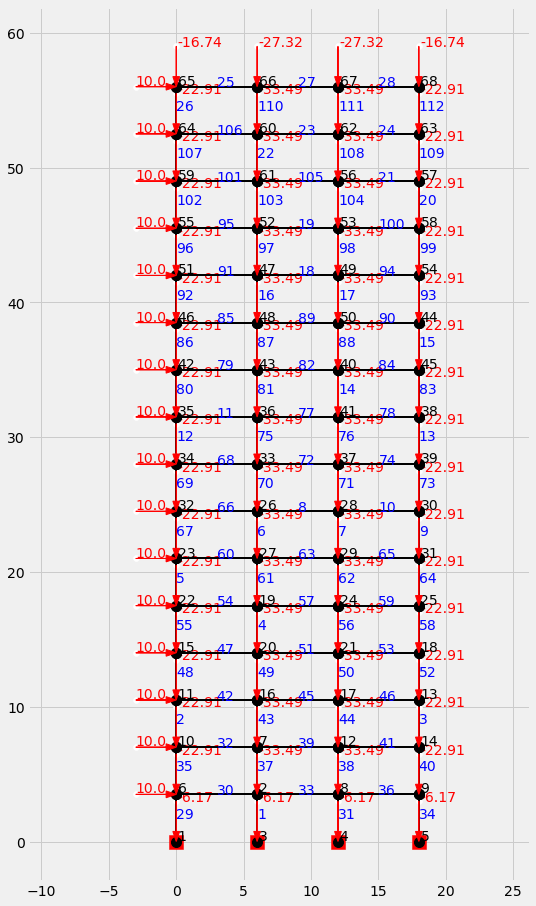

In [8]:
Frame.Draw_Frame_Setup(figure_size=[8,15], arrow_line_width=1, length_of_arrow=3, width_of_arrow=0.5)

In [3]:
Frame.Solve()

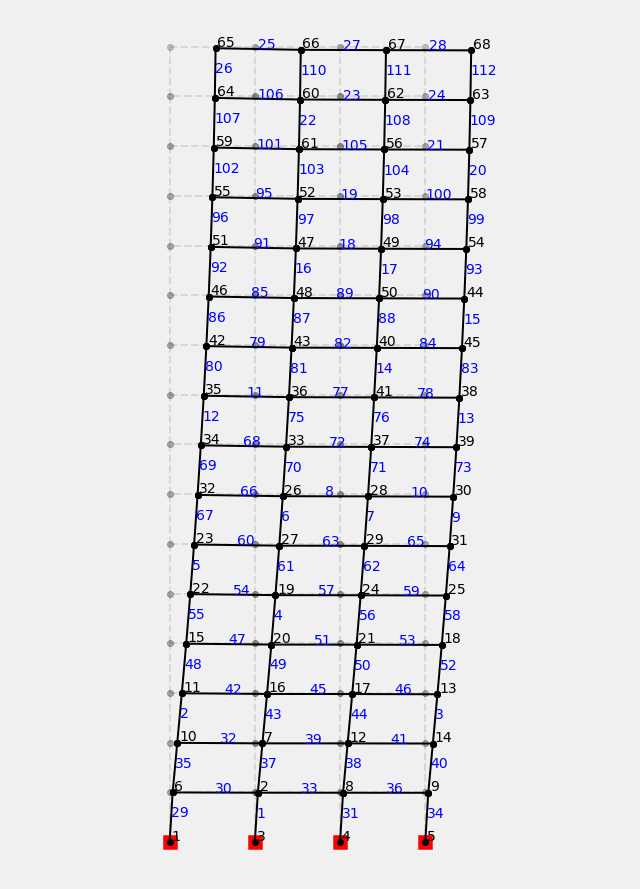

In [4]:
Frame.Draw_Frame_Displacements(figure_size=[10,15], magnification_factor=50)

In [5]:
Frame.reactions_

{1: [-32.86793290321034, 151.62985769232233, 85.17366730533169],
 3: [-45.56903883279719, 499.6749252177254, 99.97318162767093],
 4: [-45.50288940181626, 521.9063934942095, 99.83193304038016],
 5: [-36.06013886225993, 631.588823595747, 88.69612006994305]}